# SGD( Schotastic Gradient Descent) Model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Importing and Cleaning Data

In [2]:
data = pd.read_csv("data.csv")
# data.dtypes
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
# modee = data['horsepower'].mode()
data.dropna(subset=['horsepower'], inplace=True)
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


### EDA - Exploratory Data Analysis

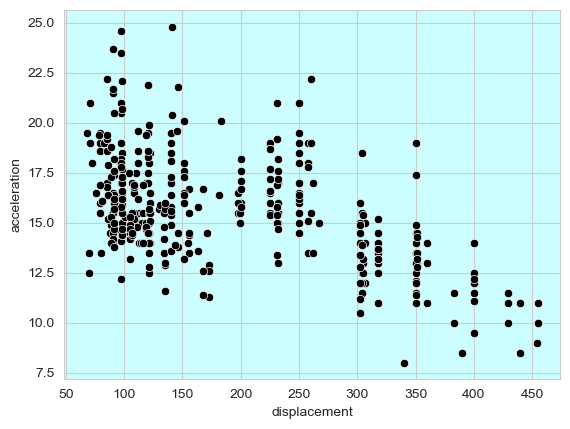

In [48]:
sns.set_style('whitegrid')
sns.set_style(rc={'axes.facecolor':'#ccfeff'})
sns.scatterplot(data, x='displacement', y='acceleration', color='black') 
plt.show()

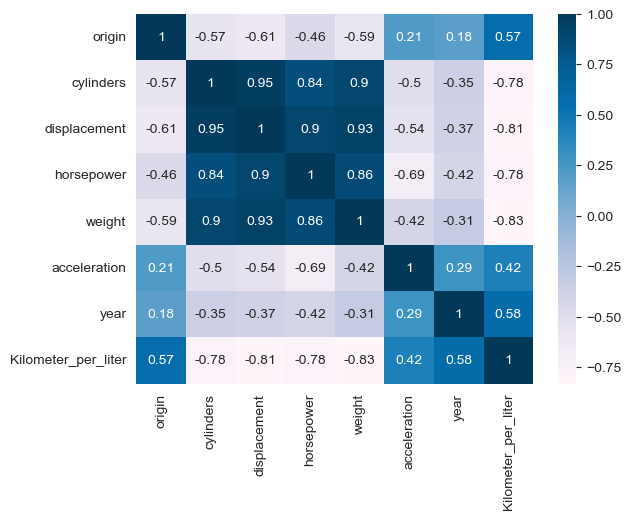

In [21]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='PuBu4')
plt.show()

In [5]:
x = data.iloc[:,1:-2].values
y = data.iloc[:,-1].values

## Splitting the dataset into the Training set and Test Set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Encoding Columns

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([('scaler', StandardScaler(), [0,1, 2, 3, 4, 5])], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

## Training the Model

In [8]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=1000, alpha=0.001)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

## Predicting the test set results

In [9]:
y_pred = regressor.predict(x_test)

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared: {}%'.format(round((r2_score(y_test, y_pred)*100),2)))

Mean Absolute Error: 1.1297789723183247
Mean Squared Error: 2.1315738634940393
R-squared: 81.03%
